In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [46]:
tita_train = pd.read_csv('../input/train.csv')
tita_test  = pd.read_csv('../input/test.csv')

In [4]:
tita_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#checking for null values
tita_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null in age and 687 null in Cabin and 2 in embarked

In [10]:
tita_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
tita_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2FF0AEE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E2FFDBF630>]], dtype=object)

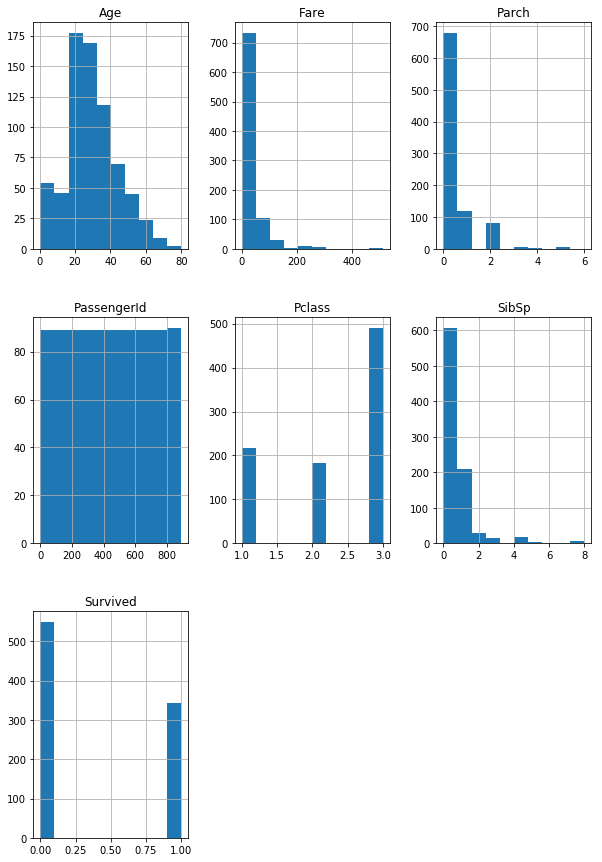

In [34]:
#lets draw histogram 
tita_train[num].hist(bins = 10, figsize = (10,15))

In [97]:
Aff_FL30 = tita_train[(tita_train['Fare'] < 30) & (tita_train['Survived'] == 1) ]
Aff_but_dead1 = tita_train[(tita_train['Survived'] == 0) & (tita_train['Fare'] < 30) ]
Aff_but_alive1 = tita_train[(tita_train['Survived'] == 1) & (tita_train['Fare'] > 30) ]

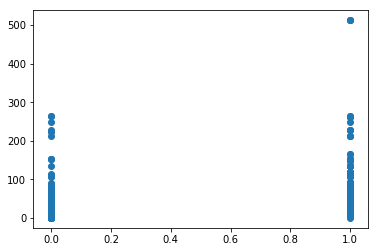

In [71]:
plt.scatter(tita_train['Survived'],tita_train['Fare'])

In [98]:
Aff_FL30['Sex'].value_counts()

female    134
male       67
Name: Sex, dtype: int64

In [99]:
Aff_FG30 = tita_train[(tita_train['Survived'] == 1) & (tita_train['Fare'] < 32) ]

In [100]:
Aff_FG30['Sex'].value_counts()

female    140
male       76
Name: Sex, dtype: int64

Female survival rate is much higher that male, its almost double

In [3]:
# Function for pre processing
#Segregating categorical and numerical variables
def cat_num(X):   
    cat = []
    num = []
    for i in X.columns:
        if X[i].dtype == object:
            cat.append(i)
        else:
            num.append(i)
    return (cat, num)

#creating dummy variable
def dum_cre(X):
    X = X.drop(['Name'],axis = 1)
    X = X.drop(['Cabin'],axis = 1)
    X = X.drop(['Ticket'],axis = 1)
    cat_ti = pd.get_dummies(X)
    cat_ti = cat_ti.drop('Sex_female', axis = 1)
    cat_ti = cat_ti.drop('Embarked_S', axis = 1)
    return cat_ti 

#joining categorical and numerical data
def join_cat_num(X,Y):
    j = pd.concat([X,Y],axis =1)
    return j 
#Drop numerical attribute
def rem_num(X):
    j = X.drop(['PassengerId'],axis = 1)
    return j

#imputing mean with median
def imput_med(X):
    median = X['Age'].median()
    X['Age'].fillna(median, inplace=True)
    return X


In [4]:
#Preprocessing the training dataset
cat_tr, num_tr = cat_num(tita_train)
cat_tr1 = dum_cre(tita_train[cat_tr])
tita_num = tita_train[num_tr]
tit_final = join_cat_num(tita_num,cat_tr1)
tit_final = rem_num(tit_final)
tit_final = imput_med(tit_final)

In [47]:
#Preprocessing the test dataset
cat_te, num_te = cat_num(tita_test)
cat_te1 = dum_cre(tita_test[cat_te])
tita_numt = tita_test[num_te]
test_final = join_cat_num(tita_numt,cat_te1)
#test_final = rem_num(test_final)
test_final = imput_med(test_final)

In [35]:
#shuffling the index
tit_final = shuffle(tit_final)

In [36]:
X_train = tit_final.ix[:,1:]
y_train = tit_final.ix[:,0]

In [37]:
#using sv
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
y_pred = svc.predict(test_final.ix[:,1:])

In [49]:
y_pred = pd.DataFrame(y_pred, columns=['Survived'])

In [50]:
sub = pd.concat([test_final.ix[:,0],y_pred],axis=1)

In [51]:
sub.to_csv('D:/kaggle/Titanic/sub.csv')

In [27]:
svc_score = cross_val_score(svc, X_train, y_train, cv=10)
svc_score.mean()

0.71155373964362734

In [29]:
#using random forest
rfc = RandomForestClassifier()
rf_score = cross_val_score(rfc, X_train, y_train, cv=10)
rf_score.mean()

0.8114813869027353